# Gradient Descent

## Definition

Given a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.
  

## Gradient Function


Gradients are (-2.125000000000001, 0.20625000000000004)


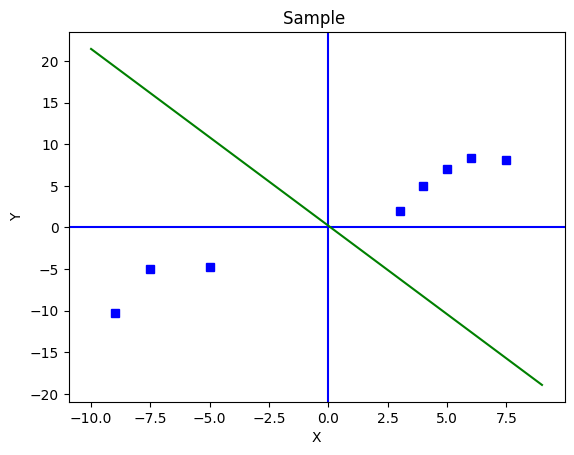

In [9]:
import math

import matplotlib.pyplot as plt

import app.regression as ar

fig, ax = plt.subplots()
plt.axhline(0, color='b')
plt.axvline(0, color='b')

train_data = [ar.Point(-9, -10.3), ar.Point(-7.5, -5), ar.Point(-5, -4.75), ar.Point(3, 2), 
              ar.Point(4, 5), ar.Point(5, 7), ar.Point(6, 8.3), ar.Point(7.5, 8.1)]

for train_datum in train_data:
    plt.plot(train_datum.x, train_datum.y, "s", color = 'b')

ax.set_title('Sample ')
ax.set_xlabel('X')
ax.set_ylabel('Y')

def gradient(train_data, feature: ar.Feature):
    # Number of training examples
    gradient_a = 0
    gradient_b = 0

    for pt in train_data:
        act_y = ar.actual_y(pt.x, feature)
        gradient_a_i = (act_y - pt.y) * pt.x
        gradient_b_i = (act_y - pt.y)
        gradient_a += gradient_a_i
        gradient_b += gradient_b_i
        

    gradient_a = gradient_a / len(train_data)
    gradient_b = gradient_b / len(train_data)

    return gradient_a, gradient_b

gradients = gradient(train_data, ar.Feature(1, 1))
print(f"Gradients are {gradients}")

xs = [x for x in range(-10, 10)]
ys = [gradients[0] * x + gradients[1]  for x in xs]

plt.plot(xs, ys, color='g')



## Calculation 

The following section depicts gradient descent calculation using different approaches

### Calculation Using Functions

Gradients are (-2.125000000000001, 0.20625000000000004)
Iteration    0: Cost 22.884531250000002  Gradient a: -40.6875, Gradient B: -1.29375   line: Feature(a=0, b=0)
Iteration 1000: Cost 0.8476148959994295  Gradient a: 4.642809956489913e-07, Gradient B: -3.4421090781777686e-05   line: Feature(a=1.0589260872681359, b=0.76425253527515)
Iteration 2000: Cost 0.847614895402893  Gradient a: 2.144884270194325e-11, Gradient B: -1.590755582814296e-09   line: Feature(a=1.0589256198563128, b=0.7642871884810879)
Iteration 3000: Cost 0.8476148954028927  Gradient a: 6.661338147750939e-15, Gradient B: -7.360778653264788e-14   line: Feature(a=1.058925619834712, b=0.7642871900825703)
Iteration 4000: Cost 0.847614895402893  Gradient a: 5.995204332975845e-15, Gradient B: -5.495603971894525e-15   line: Feature(a=1.058925619834711, b=0.7642871900826386)
Iteration 5000: Cost 0.847614895402893  Gradient a: 5.995204332975845e-15, Gradient B: -5.495603971894525e-15   line: Feature(a=1.058925619834711, b=0.7642

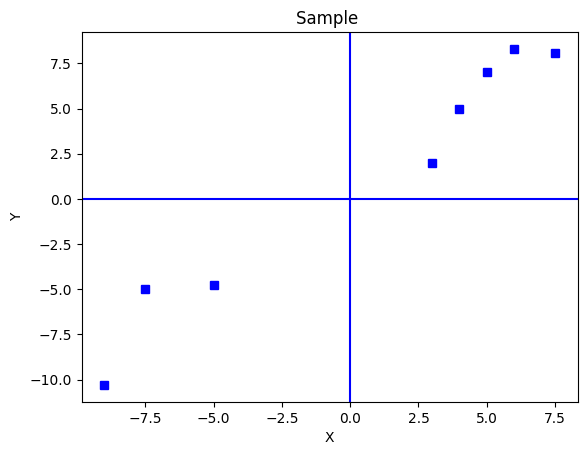

In [12]:
import math
from app.regression import Point, Feature, actual_y, cost
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.axhline(0, color='b')
plt.axvline(0, color='b')

train_data = [Point(-9, -10.3), Point(-7.5, -5), Point(-5, -4.75), Point(3, 2), 
              Point(4, 5), Point(5, 7), Point(6, 8.3), Point(7.5, 8.1)]

for train_datum in train_data:
    plt.plot(train_datum.x, train_datum.y, "s", color='b')

ax.set_title('Sample ')
ax.set_xlabel('X')
ax.set_ylabel('Y')


def gradient(train_data, feature: Feature):
    # Number of training examples
    gradient_a = 0
    gradient_b = 0

    for pt in train_data:
        act_y = actual_y(pt.x, feature)
        gradient_a_i = (act_y - pt.y) * pt.x
        gradient_b_i = (act_y - pt.y)
        gradient_a += gradient_a_i
        gradient_b += gradient_b_i
        

    gradient_a = gradient_a / len(train_data)
    gradient_b = gradient_b / len(train_data)

    return gradient_a, gradient_b

gradients = gradient(train_data, Feature(1, 1))
print(f"Gradients are {gradients}")

num_iters = 10000
alpha = 0.01
a = 0
b = 0

for i in range(num_iters):
    # Calculate the gradient and update the parameters using gradient_function
    ll = Feature(a, b)
    cst = cost(train_data, ll)

    (gradient_a, gradient_b)  = gradient(train_data, ll)

    b = b - alpha * gradient_b                            
    a = a - alpha * gradient_a                            

    if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: Cost {cst} ",
              f"Gradient a: {gradient_a}, Gradient B: {gradient_b}  ",
              f"line: {ll}")
    
 

In [ ]:
## Calculation Using Numpy!

In [14]:
import numpy as np

xs = np.array([-9, -7.5, -5, 3, 4, 5, 6, 7.5])
ys = np.array([-10.3, -5, -4.75, 2, 5, 7, 8.3, 8.1])

def cost(x, y, a_in, b_in):
    m = len(xs)
    guess = x * a_in + b_in
    errys_sq = (guess - y) ** 2
    err_sum = errys_sq.sum() / (2 * m)
    return err_sum
    
def gradient(x, y, a_in, b_in):
    # Number of training examples
    
    guess_y = x * a_in + b_in
    ga = ((guess_y - y) * x).sum()
    gb = (guess_y - y).sum()

    m = len(xs)

    ga = ga / m
    gb = gb / m

    return ga, gb

gradients = gradient(xs, ys, 1, 1)
print(f"Gradients are {gradients}")

num_iters = 10000
alpha = 0.01
a = 0
b = 0

for i in range(num_iters):
    # Calculate the gradient and update the parameters using gradient_function
    cst = cost(xs, ys, a, b)
    (gradient_a, gradient_b)  = gradient(xs, ys, a, b)

    b = b - (alpha * gradient_b)                            
    a = a - (alpha * gradient_a)                            

    if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: Cost {cst} ",
              f"Gradient a: {gradient_a}, Gradient B: {gradient_b}  ",
              f"line: {a}-{b}")
    
 

Gradients are (-2.125000000000001, 0.20625000000000004)
Iteration    0: Cost 22.884531250000002  Gradient a: -40.6875, Gradient B: -1.2937499999999997   line: 0.406875-0.012937499999999998
Iteration 1000: Cost 0.8476148959994294  Gradient a: 4.642809956489913e-07, Gradient B: -3.4421090781777686e-05   line: 1.058926082625326-0.7642528794860578
Iteration 2000: Cost 0.847614895402893  Gradient a: 2.144884270194325e-11, Gradient B: -1.590755582814296e-09   line: 1.0589256198560983-0.7642871884969955
Iteration 3000: Cost 0.8476148954028926  Gradient a: 6.661338147750939e-15, Gradient B: -7.360778653264788e-14   line: 1.058925619834712-0.7642871900825711
Iteration 4000: Cost 0.847614895402893  Gradient a: 5.995204332975845e-15, Gradient B: -5.495603971894525e-15   line: 1.058925619834711-0.7642871900826386
Iteration 5000: Cost 0.847614895402893  Gradient a: 5.995204332975845e-15, Gradient B: -5.495603971894525e-15   line: 1.058925619834711-0.7642871900826386
Iteration 6000: Cost 0.847614895

### Calculation Using Implemented Algorithm
The app section implemented the algorithm on gradient_descent.py


In [12]:
from app.gradient_descent import Point, Feature
from app.gradient_descent import GradientDescent

train_data = [Point(-9, -10.3), Point(-7.5, -5), Point(-5, -4.75), Point(3, 2),
              Point(4, 5), Point(5, 7), Point(6, 8.3), Point(7.5, 8.1)]

gd = GradientDescent(train_data, epochs=800)  # epochs=10000, learning_rate=0.01
init_feature = Feature(0, 0)
result = gd.optimize(init_feature) # Feature(0, -1, 0)
optimized_feature = result[-1]['optimized_feature']
print(f"Optimized feature {init_feature} to {optimized_feature}")

Optimized feature Feature(a=0, b=0) to Feature(a=1.05892909599037, b=0.7640294731570643)


### Calculation Using sciKit-Learn

SciKit-learn package is used to run the calculation 

In [13]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

xs = [[-9], [-7.5], [-5], [3], [4], [5], [6], [7.5]]
ys = [[-10.3], [-5], [-4.75], [2], [5], [7], [8.3], [8.1]]

reg.fit(xs, ys)

print(f"Result coef : {reg.coef_} and intercept is {reg.intercept_}")

Result coef : [[1.05892562]] and intercept is [0.76428719]
